In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [17]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Ref. -> https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1
    """
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()


2D filtering

In [3]:
def median_blur(img, kernel, padding_way):
    """Median blur 2D convolution/filtering.

    :param img:             one channel image(W x H 2D list/vector).
    :param kernel:          M x N 2D list/vector. Simplifying assumption: M and N are odd.
    :param padding_way:     "REPLICA" or "ZERO"
    """
    W, H = img.shape
    M, N = kernel.shape
    padding_left = (N - 1) // 2
    padding_up = (M - 1) // 2

    _img = np.zeros((W + M - 1, H + N - 1), dtype=np.uint8)
    if padding_way == "ZERO":
        _img[padding_left:W + padding_left, padding_up:H + padding_up] = img

    if padding_way == "REPLICA":
        _img[padding_left:W + padding_left, padding_up:H + padding_up] = img
        _img[:padding_up, padding_left:H + padding_left] = img[0, :]                    # up
        _img[W + padding_up:, padding_left:H + padding_left] = img[-1, :]               # bottom
        _img[:, :padding_left] = _img[:, padding_left:padding_left + 1]                 # left
        _img[:, W + padding_left:] = _img[:, H + padding_left - 1:H + padding_left]     # right

    def median(matrix):
        """ Use insertion sort O(n^2).
            Or Merge sort O(nlogn), Quick sort O(nlogn)
        """
        arr = []
        for m in range(M):
            for n in range(N):
                arr.append(matrix[m][n])
        # Insertion sort
        for i, cursor in enumerate(arr):
            pos = i
            while pos > 0 and arr[pos-1] > cursor:
                arr[pos] = arr[pos-1]
                pos -= 1
            arr[pos] = cursor
        return arr[M*N//2]

    img_median_blur = np.zeros((W, H), dtype=np.uint8)
    for w in range(W):
        for h in range(H):
            img_median_blur[w][h] = median(_img[w:w+M, h:h+N])

    return img_median_blur

In [18]:
def median_blur_modified(img, kernel, padding_way):
    """Median blur 2D convolution/filtering.

    :param img:             one channel image(W x H 2D list/vector).
    :param kernel:          M x N 2D list/vector. Simplifying assumption: M and N are odd.
    :param padding_way:     "REPLICA" or "ZERO"
    """
    W, H = img.shape
    M, N = kernel.shape
    left = (N - 1) // 2
    up = (M - 1) // 2

    _img = np.zeros((W + M - 1, H + N - 1), dtype=np.uint8)
    if padding_way == "ZERO":
        _img = cv.copyMakeBorder(img, up, up, left, left, cv.BORDER_CONSTANT, value=0)

    if padding_way == "REPLICA":
        _img = cv.copyMakeBorder(img, up, up, left, left, cv.BORDER_REPLICATE)

    img_median_blur = np.zeros((W, H), dtype=np.uint8)
    for w in range(W):
        for h in range(H):
            img_median_blur[w][h] = np.median(_img[w:w+M, h:h+N])

    return img_median_blur

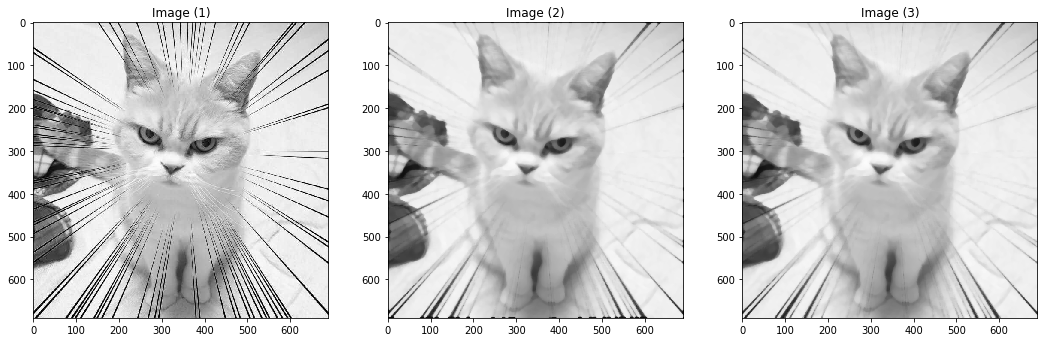

In [19]:
kernel = np.ones((9, 9))
img = cv.imread('data/cat.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_blur_zp = median_blur_modified(img, kernel, padding_way='ZERO')
img_blur_rp = median_blur_modified(img, kernel, padding_way='REPLICA')
show_images([img, img_blur_zp, img_blur_rp])
